## Bike Sharing

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

#### Context
Bike Sharing sepeda adalah generasi baru dari persewaan sepeda tradisional yang seluruh prosesnya, mulai dari keanggotaan, penyewaan, dan pengembalian, menjadi otomatis. Melalui sistem tersebut, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi pada posisi lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan, dan kesehatan.
Terlepas dari penerapan sistem berbagi sepeda di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, keberangkatan, dan posisi kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, peristiwa-peristiwa terpenting di kota tersebut diharapkan dapat dideteksi dengan memantau data ini.

#### Problem Statement
Dalam Praktiknya Bike Sharing mengalami banyak masalah, salah satunya adalah masalah alam terutama cuaca. Alam pada dasarnya adalah faktor eksternal karena tidak bisa di kendalikan oleh manusia, tapi bukan berarti tidak ada solusi atau tindakan yang bisa dilakukan untuk mengurangi dampak tersebut. seperti pepatah "there is no bad weather, only bad clothing". **maka dari itu akan dilakukan analisis bagaimana dampak cuaca terhadap jumlah penggunaan bike sharing sehingga kedepannya dapat dilakukan tindakan preventif untuk memaksimalkan efisiensi pelayanan bike sharing.**

#### Analytic Approch
Pendekatan analytic digunakan untuk memilih feature mana saja yang akan digunakan dalam model serta untuk mengenali pola atau trend yang terjadi sehingga dapat memperkirakan perkembangan yang akan terjadi pada model regresi

#### Metric Evaluation 
Metric evaluation adalah pada proses mengukur dan mengevaluasi kinerja suatu model berdasarkan serangkaian metrik atau indikator tertentu. Dalam analisis ini akan digunakan RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi pengguna sepedah sesuai dengan limitasi fitur yang digunakan. 

## Data Understanding

- Dataset merupakan data pengguna sepedah dan cuaca pada tahun 2011 hingga 2012 

In [355]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [356]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,12/9/2011,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,6/17/2012,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,6/15/2011,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,3/31/2012,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,7/31/2012,0.55,1,0,3,0.6970,0.76,18,99,758,857


### Data Cleaning

In [357]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (12165, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [358]:
df.isnull().any().any().sum()

0

In [359]:
duplicate_rows = df[df.duplicated()]

# Menampilkan jumlah total data duplikat
total_duplicate_rows = duplicate_rows.shape[0]
print("Jumlah total data duplikat:", total_duplicate_rows)

# Menampilkan data duplikat
print("Data Duplikat:")
duplicate_rows

Jumlah total data duplikat: 0
Data Duplikat:


,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt


In [360]:
display(df.describe(), df.describe(include='object'))

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


,dteday
count,12165
unique,731
top,8/9/2011
freq,22


In [361]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,dteday,731,"[12/9/2011, 6/17/2012, 6/15/2011, 3/31/2012, 7/31/2012, 10/1/2012, 8/28/2012, 1/1/2012, 10/13/2011, 6/9/2012, 6/28/2011, 12/21/2011, 1/31/2012, 2/7/2012, 5/15/2012, 1/4/2011, 2/27/2012, 8/21/2012, 2/13/2011, 7/9/2012, 12/18/2012, 6/7/2011, 9/26/2012, 8/20/2012, 2/17/2011, 5/8/2012, 6/26/2012, 9/2/2011, 3/29/2011, 6/16/2012, 9/17/2011, 7/10/2011, 2/2/2011, 9/23/2012, 2/25/2011, 3/12/2011, 5/9/2011, 8/26/2012, 3/31/2011, 3/22/2012, 8/24/2012, 5/31/2012, 9/8/2012, 6/25/2011, 10/9/2011, 5/5/2011, 5/14/2012, 7/22/2012, 4/2/2011, 2/4/2012, 10/22/2012, 2/23/2012, 3/8/2012, 7/23/2011, 1/17/2012, 6/22/2012, 10/6/2012, 10/15/2012, 4/7/2011, 1/3/2012, 7/18/2011, 10/19/2011, 12/26/2011, 8/10/2011, 11/7/2011, 12/17/2012, 3/2/2012, 2/26/2011, 8/22/2011, 3/2/2011, 1/28/2012, 10/16/2011, 12/2/2011, 2/18/2012, 11/16/2012, 11/6/2011, 5/18/2012, 4/22/2011, 1/30/2011, 8/6/2011, 7/30/2011, 1/28/2011, 2/18/2011, 4/15/2011, 11/30/2011, 1/26/2012, 6/4/2012, 11/24/2011, 11/27/2012, 1/22/2011, 4/2/2012, 7/15/2012, 3/23/2011, 12/31/2011, 3/9/2011, 1/11/2012, 2/24/2011, 1/29/2011, 1/8/2012, 4/5/2012, ...]"
1,hum,89,"[0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]"
2,weathersit,4,"[1, 2, 3, 4]"
3,holiday,2,"[0, 1]"
4,season,4,"[4, 2, 3, 1]"
5,atemp,65,"[0.3485, 0.5152, 0.6212, 0.697, 0.4545, 0.6515, 0.2727, 0.6061, 0.4394, 0.2576, 0.5455, 0.2273, 0.6667, 0.4091, 0.3939, 0.6364, 0.5303, 0.5, 0.3636, 0.7424, 0.3333, 0.4242, 0.5758, 0.4697, 0.5909, 0.7576, 0.6818, 0.303, 0.7727, 0.1212, 0.803, 0.3182, 0.2121, 0.7879, 0.197, 0.1515, 0.4848, 0.1818, 0.3788, 0.0909, 0.2879, 0.2424, 0.5606, 0.1667, 0.7121, 0.7273, 0.0303, 0.8333, 0.8636, 0.8788, 0.1364, 0.1061, 0.8485, 0.8182, 0.0455, 0.8939, 0.9242, 0.0152, 0.0758, 0.0606, 0.9545, 0.9091, 0.0, 1.0, 0.9848]"
6,temp,50,"[0.36, 0.54, 0.62, 0.76, 0.46, 0.7, 0.26, 0.82, 0.66, 0.44, 0.58, 0.28, 0.22, 0.4, 0.38, 0.68, 0.56, 0.72, 0.52, 0.6, 0.34, 0.42, 0.64, 0.24, 0.48, 0.8, 0.32, 0.16, 0.74, 0.88, 0.3, 0.14, 0.9, 0.18, 0.06, 0.2, 0.5, 0.08, 0.78, 0.84, 0.04, 0.86, 0.12, 0.94, 0.1, 0.92, 0.96, 0.02, 0.98, 1.0]"
7,hr,24,"[16, 4, 23, 8, 18, 0, 22, 9, 5, 7, 14, 15, 21, 20, 11, 3, 13, 19, 6, 12, 1, 2, 10, 17]"
8,casual,305,"[24, 2, 17, 19, 99, 6, 20, 13, 219, 1, 11, 9, 0, 110, 51, 7, 10, 45, 30, 87, 5, 15, 60, 49, 122, 254, 81, 80, 220, 46, 36, 14, 3, 48, 31, 310, 32, 72, 26, 21, 142, 245, 16, 8, 58, 126, 47, 62, 12, 93, 27, 74, 28, 55, 50, 132, 68, 75, 29, 18, 168, 57, 61, 283, 148, 43, 4, 138, 264, 71, 121, 41, 186, 44, 39, 237, 225, 226, 224, 118, 22, 170, 162, 35, 54, 84, 200, 116, 117, 38, 53, 65, 37, 25, 196, 78, 113, 66, 33, 253, ...]"
9,registered,742,"[226, 16, 90, 126, 758, 39, 196, 27, 5, 315, 20, 278, 273, 127, 74, 48, 192, 110, 223, 652, 432, 808, 188, 119, 32, 157, 118, 141, 49, 134, 21, 227, 437, 50, 101, 23, 212, 1, 142, 171, 474, 8, 83, 233, 155, 370, 41, 43, 4, 88, 156, 99, 169, 400, 237, 7, 72, 59, 109, 228, 17, 148, 6, 26, 73, 100, 247, 91, 293, 95, 222, 383, 168, 79, 176, 146, 216, 369, 220, 22, 338, 3, 11, 123, 180, 112, 42, 181, 618, 209, 374, 467, 128, 179, 67, 104, 33, 413, 14, 19, ...]"


Secara umum, kita bisa melihat bahwa:
* dataset data_bike_sharing memiliki 11 kolom dan 12.165 baris
* tidak terdapat data kosong
* tidak terdapat data duplicate

### Missing Value

In [362]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

dteday        0.0
hum           0.0
weathersit    0.0
holiday       0.0
season        0.0
atemp         0.0
temp          0.0
hr            0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Karena data tidak memiliki kekosongan, duplikasi, dan secara domain seluruh data telah memenuhi kaidahnya. Maka selanjutnya akan dilakukan analisa data dengan data yang utuh atau sama yaitu, 11 kolom dan 12.165 baris data.

### Exploratory Data Analysis

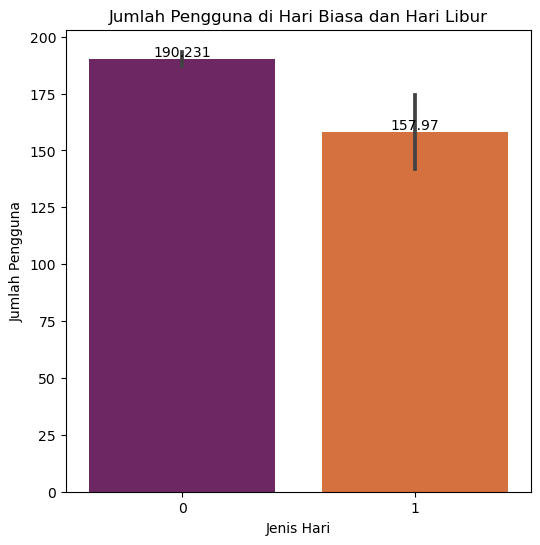

In [363]:
# melihat perbedaan jumlah pengguna antara hari biasa dan hari libur
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=df['holiday'], y=df['cnt'], palette='inferno')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Jumlah Pengguna di Hari Biasa dan Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Pengguna')
plt.show()

Berdasarkan grafik diatas, rata-rata jumlah penguna pada holiday lebih rendah sekitar 30 orang.

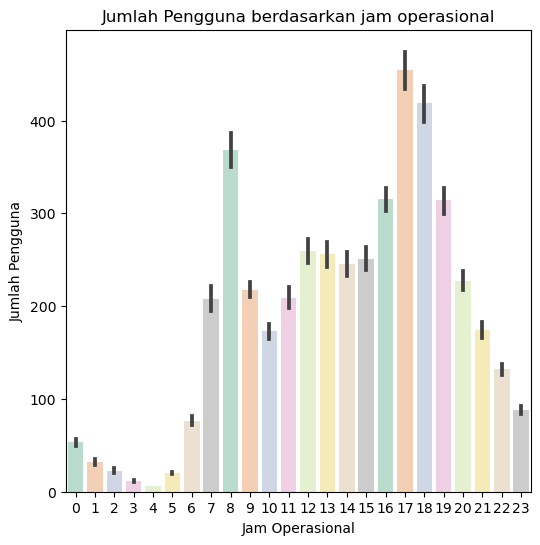

In [364]:
plt.figure(figsize=(6, 6))
sns.barplot(x=df['hr'], y=df['cnt'], palette='Pastel2')
plt.title('Jumlah Pengguna berdasarkan jam operasional')
plt.xlabel('Jam Operasional')
plt.ylabel('Jumlah Pengguna')
plt.show()

Dari Grafik diatas menunjukkan bahwa rata-rata pengguna sepedah menyewa pada jam ke 7 operasional

### Data Preprocessing

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [365]:
# Membuat duplikasi dataframe
df_model = df.copy()

### Drop Columns

Untuk memilih feature mana yang akan di hilangkan dalam ekuasi, akan di lakukan pertimabangan dari faktor domain knowladge. Sehingga hanya feature yang memiliki relevansi yang akan dilakukan regressi. 

- Jika ditinjau berdasar domain knowledge, fitur 'atemp' akan dihilangkan karena sudah ada fitur temp yang sama-sama mengukur suhu keadaan sekitar. Perbedaan keduanya terdapat pada feeling atau perasaan pada atemp, sehingga memiliki akurasi yang lebih rendah meskipun tidak terlalu signifikan. Dan apabila menggunakan keduanya maka hanya akan memperlambat proses penelitian.

In [366]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['dteday','atemp','casual','registered'], axis=1, inplace=True)

In [367]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         12165 non-null  float64
 1   weathersit  12165 non-null  int64  
 2   holiday     12165 non-null  int64  
 3   season      12165 non-null  int64  
 4   temp        12165 non-null  float64
 5   hr          12165 non-null  int64  
 6   cnt         12165 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 665.4 KB


### Data Correlation

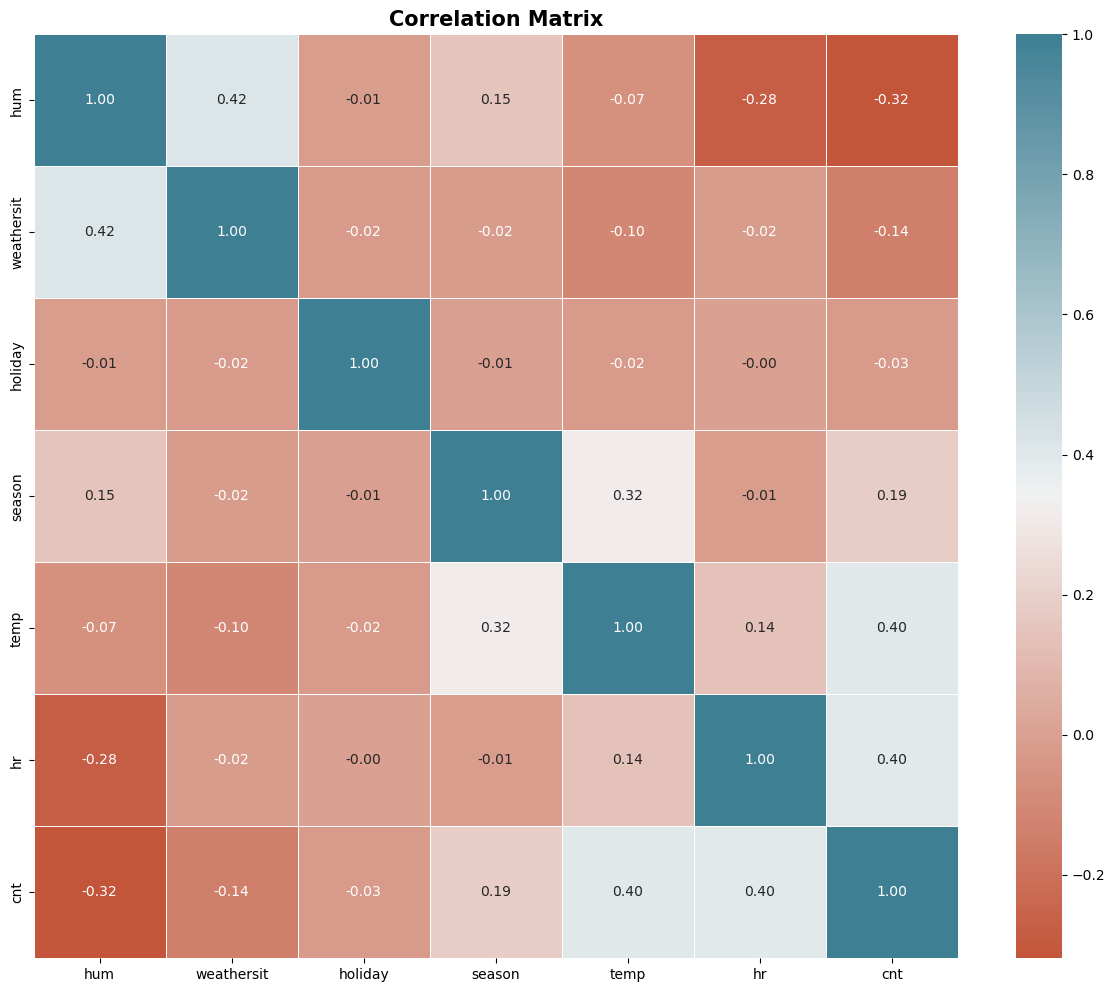

In [368]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur cnt. Selanjutnya adalah fitur casual dengan temperatur menunjukkan korelasi yang cukup tinggi, hal tersebut dapat berhubungan karena semakin nyaman (tidak terlalu tinggi atau terlalu rendah) suhu lingkungan maka minat orang-orang untuk bersepdah juga naik. 

#### Outlier Detection

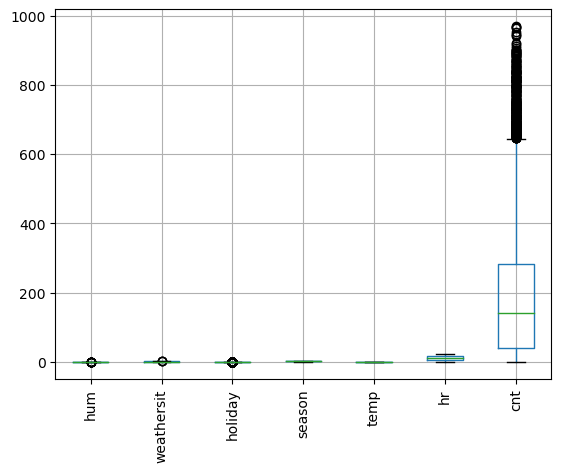

In [369]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat banyak sekali outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [370]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')     

In [371]:
# Outliers pada fitur casual
find_anomalies(df_model['cnt'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


Feature Engineering

In [372]:
# cnt
# Cek deskriptif statistik kolom casual
df_model['cnt'].describe()

count    12165.000000
mean     189.271023  
std      181.223903  
min      1.000000    
25%      40.000000   
50%      142.000000  
75%      282.000000  
max      970.000000  
Name: cnt, dtype: float64

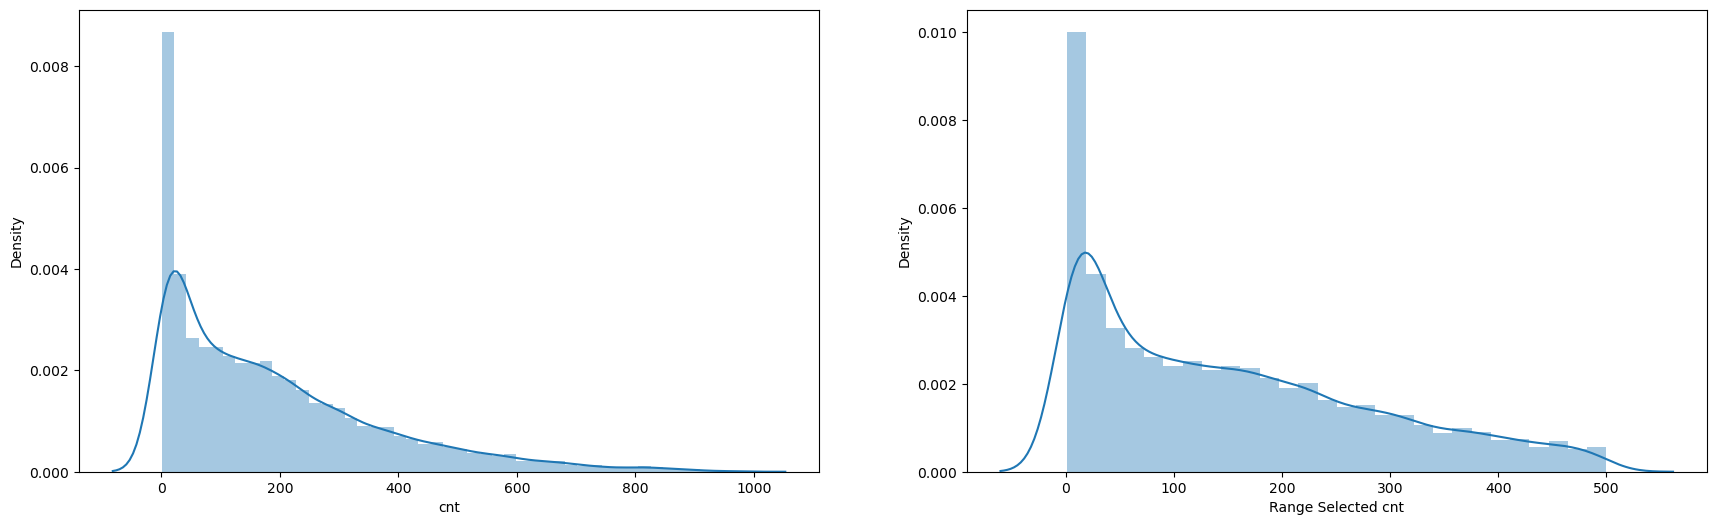

In [373]:
# Plot distribusi data sebelum dan sesudah filtering
df_model = df_model[(df_model['cnt'] <= 500)]

fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['cnt'], ax=axes[1])
axes[0].set_xlabel('cnt')
axes[1].set_xlabel('Range Selected cnt');

In [374]:
# cnt
# Cek deskriptif statistik kolom casual
df_model['cnt'].describe()

count    11275.000000
mean     154.081596  
std      132.586222  
min      1.000000    
25%      34.000000   
50%      125.000000  
75%      241.000000  
max      500.000000  
Name: cnt, dtype: float64

In [376]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11275 entries, 0 to 12163
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hum         11275 non-null  float64
 1   weathersit  11275 non-null  int64  
 2   holiday     11275 non-null  int64  
 3   season      11275 non-null  int64  
 4   temp        11275 non-null  float64
 5   hr          11275 non-null  int64  
 6   cnt         11275 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 704.7 KB


Pada akhirnya, tersisa 12163 baris data yang akan digunakan untuk pemodelan. Ini berarti hanya ada 2 data dieliminasi untuk menghilangkan outlier.

### Modeling

In [377]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### Data Splitting

In [378]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

#### Train & Test Splitting

In [379]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

#### Bench Mark Model

In [380]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-126.8322378  -127.72090592 -125.55147643 -124.03968384 -127.98012199] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-88.56325998 -88.74274508 -89.12025436 -86.1629449  -89.63595807] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.4520088  -1.34058385 -1.4209931  -1.55966865 -1.3424332 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-85.17132074 -87.48056307 -85.71525857 -83.08232247 -84.31734606] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-57.26351902 -58.67185455 -59.01650791 -55.18839099 -57.48036997] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())

In [381]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-126.424885,1.463994,-88.445032,1.198730,-1.423138,0.081003
1,KNN Regressor,-85.153362,1.464243,-57.524128,1.346846,-0.750514,0.042524
2,DecisionTree Regressor,-103.415392,2.516914,-69.634011,1.765107,-0.978239,0.043034
3,RandomForest Regressor,-80.857652,1.822809,-54.695259,1.058339,-0.685272,0.036949
4,XGBoost Regressor,-77.940310,2.058181,-52.672477,1.665519,-0.636894,0.027919


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.
- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [382]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,72.965045,51.332248,0.922078
RandomForest,76.494256,53.062510,0.893808


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [383]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [384]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [385]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
       

In [386]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
17,0.444250,0.055862,0.019906,0.008476,0.6,0.001,190,5,0.04,9,...,1.205925,1,-0.949096,-0.904794,-0.878295,-1.048493,-0.853095,-0.926755,0.068667,1
7,0.494655,0.022822,0.025713,0.002237,0.9,0.059948,119,8,0.05,5,...,1.244319,2,-0.999347,-0.955405,-0.909006,-1.148976,-0.890890,-0.980725,0.092206,2
18,0.274534,0.021495,0.008799,0.001722,0.9,0.007743,177,2,0.83,10,...,1.369973,4,-1.174196,-1.100994,-1.181315,-1.277415,-1.109200,-1.168624,0.063455,8
0,0.187827,0.009893,0.011600,0.004364,0.7,0.007743,144,2,0.68,10,...,1.259090,5,-1.172940,-1.096549,-1.049822,-1.300274,-1.109465,-1.145810,0.086668,7
20,0.279997,0.019931,0.021808,0.010724,0.9,0.007743,143,4,0.38,6,...,1.240402,3,-1.073975,-0.990559,-1.019472,-1.165625,-0.930964,-1.036119,0.079518,3


In [387]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -73.5948557979585
Best_params: {'model__subsample': 0.6, 'model__reg_alpha': 0.001, 'model__n_estimators': 190, 'model__max_depth': 5, 'model__learning_rate': 0.04, 'model__gamma': 9, 'model__colsample_bytree': 0.9}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [388]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,72.230525,51.065913,0.890326


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [389]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,72.965045,51.332248,0.922078


In [390]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,72.230525,51.065913,0.890326


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 73.00, 51.40, 0.930
- RMSE, MAE & MAPE setelah tuning: 72.30, 51.10, 0.900

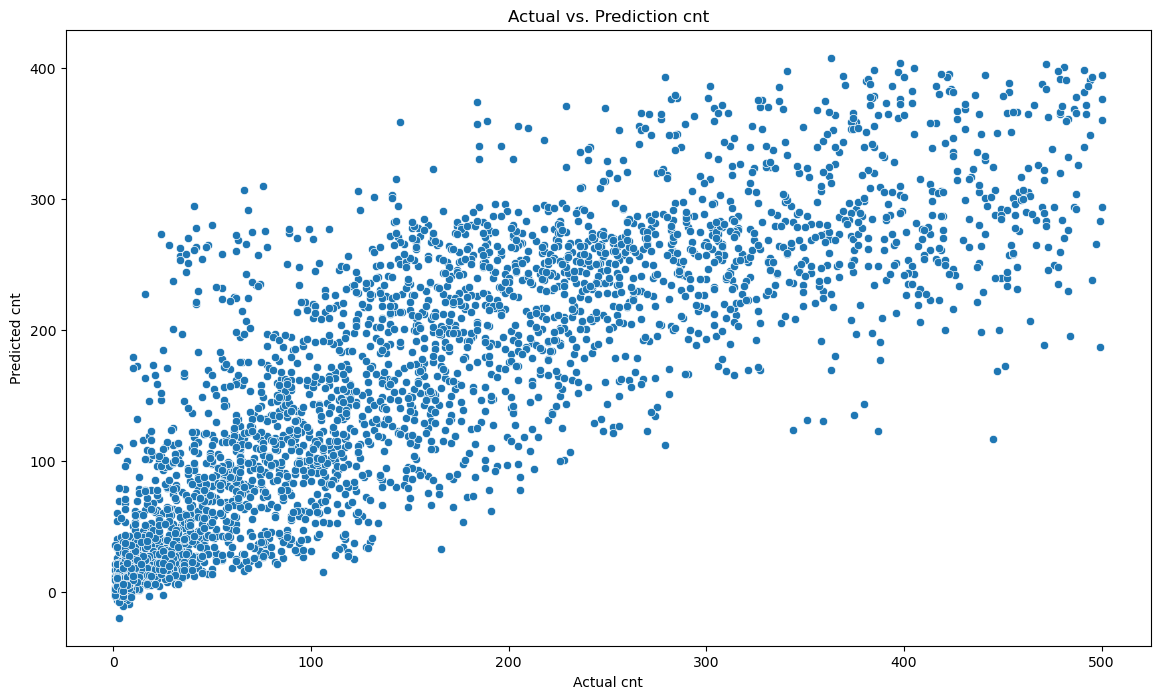

In [391]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction cnt', 
                                               xlabel='Actual cnt', 
                                               ylabel='Predicted cnt');

Karena adanya nilai-nilai error yang terlalu besar membuat hampir tidak ada perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 89% menjadikan model ini dapat dikategorikan pada kesalahan sangat besar atau perlu perbaikan mendalam.

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

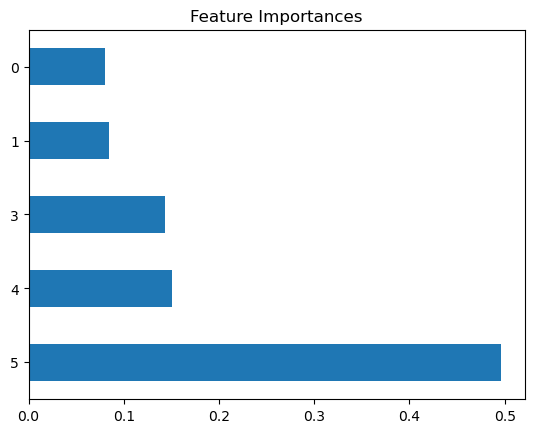

In [392]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

#### Conclusion

Berdasarkan pemodelan yang sudah dilakukan, fitur 'temp','season' dan 'weathersit' menjadi fitur yang paling berpengaruh terhadap 'cnt'.

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~89%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan pengguna baru pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 89% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek spesifikasi speda dan juga services, seperti kenyamanan transaksi, tersedianya station di tempat-tempat tujuan pengguna, atau adanya promo, bonus dan lain-lain.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi. Namun, kita dapat melakukan A/B testing terhadap model yang sudah dibuat pada project ini untuk mengetahui tingkat efektifitas penggunaan model terhadap peningkatan jumlah pengguna(cnt). Nantinya, dari hasil A/B testing, kita bisa mendapatkan insight lainnya terkait perihal yang bisa dan harus diperbaiki pada model.  

#### Recommendation

    Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap pengguna bike sharing dari model sekarang dengan model terbaru.

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Mengecek prediksi mana saja yang memiliki nilai error yang tinggi. Kita dapat mengelompokkan error tersebut ke dalam grup overestimation dan underestimation, lalu memilih 5% error paling ekstrim saja untuk tiap grup. Nantinya pengelompokkan akan menjadi 3 grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('cnt'), seperti lokasi bike station atau adanya komplain atau tidak. Selain itu, adanya penambahan data terkini untukbike sharing tentu akan dapat mengimprovisasi kapasitas prediksi dari model.
<br><br>   
3. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.
<br><br>   
4. Model yang sudah dibangun ini bisa dimanfaatkan untuk pengembangan pembuatan model lainnya. Contohnya seperti pembuatan model untuk memprediksi lama rata-rata penggunaan sepedah atau tingkat kepuasan pelanggan.